An example using a one-class SVM for novelty detection.

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

Automatically created module for IPython interactive environment


In [2]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
xx.shape, yy.shape

((500, 500), (500, 500))

In [4]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train[:5]

array([[ 2.21468187,  2.44038806],
       [ 1.55966085,  2.1346001 ],
       [ 2.16567494,  2.41812365],
       [ 1.77338464,  1.9106996 ],
       [ 2.68656701,  1.42199243]])

In [6]:
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_test[:5]

array([[ 2.60707333,  2.13327294],
       [ 1.84210031,  2.10061683],
       [ 1.86458832,  1.54573035],
       [ 2.23790799,  1.99878496],
       [ 2.2062718 ,  1.4886486 ]])

In [7]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers[:5]

array([[ 3.94042451,  0.80832542],
       [-1.37015787,  2.93705658],
       [-3.72828763, -1.16815587],
       [ 3.53115071,  1.1652274 ],
       [-3.94915557, -3.40654305]])

In [8]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)  # 拟合模型

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [9]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1])

In [10]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

In [11]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z[:5]

array([[-7.69119388, -7.66966553, -7.64803672, ..., -9.47863155,
        -9.48009466, -9.48153116],
       [-7.67032368, -7.64855875, -7.62669233, ..., -9.47718446,
        -9.4786696 , -9.48012782],
       [-7.64936468, -7.62736225, -7.6052573 , ..., -9.47571124,
        -9.47721871, -9.47869894],
       [-7.6283191 , -7.60607826, -7.58373387, ..., -9.47421143,
        -9.47574152, -9.47724408],
       [-7.60718917, -7.58470905, -7.56212435, ..., -9.47268455,
        -9.47423758, -9.47576277]])

In [30]:
[0, Z.max(), Z.min()]

[0, 0.30788107451430413, -9.4815311569909149]

Text(0.5,0,'error train: 20/200 ; errors novel regular: 2/40 ; errors novel abnormal: 1/40')

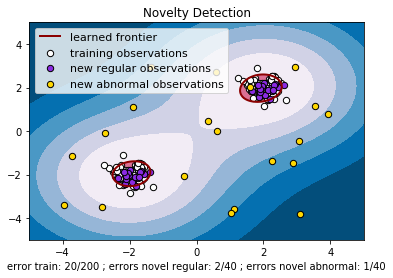

In [28]:
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')  # 填充颜色
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))